# Data Analysis



**Importing Libraries**

In [ ]:
!pip install hmmlearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, GRU, Input, Dropout
from keras.models import Sequential, Model
from keras.applications import VGG16
from keras.optimizers import Adam
import cv2
import pywt
from hmmlearn import hmm

**Importing & Inspecting Data**

In [ ]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [ ]:
df.describe().round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,...,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00,11500.00
mean,-11.58,-10.91,-10.19,-9.14,-8.01,-7.00,-6.50,-6.69,-6.56,-6.17,...,-10.15,-11.63,-12.94,-13.67,-13.36,-13.05,-12.71,-12.43,-12.20,3.00
std,165.63,166.06,163.52,161.27,161.00,161.33,161.47,162.12,162.03,160.44,...,164.65,166.15,168.55,168.56,167.26,164.24,162.90,162.89,164.85,1.41
min,-1839.00,-1838.00,-1835.00,-1845.00,-1791.00,-1757.00,-1832.00,-1778.00,-1840.00,-1867.00,...,-1867.00,-1865.00,-1642.00,-1723.00,-1866.00,-1863.00,-1781.00,-1727.00,-1829.00,1.00
25%,-54.00,-55.00,-54.00,-54.00,-54.00,-54.00,-54.00,-55.00,-55.00,-54.00,...,-55.00,-56.00,-56.00,-56.00,-55.00,-56.00,-55.00,-55.00,-55.00,2.00
50%,-8.00,-8.00,-7.00,-8.00,-8.00,-8.00,-8.00,-8.00,-7.00,-7.00,...,-9.00,-10.00,-10.00,-10.00,-10.00,-9.00,-9.00,-9.00,-9.00,3.00
75%,34.00,35.00,36.00,36.00,35.00,36.00,35.00,36.00,36.00,35.25,...,34.00,34.00,33.00,33.00,34.00,34.00,34.00,34.00,34.00,4.00
max,1726.00,1713.00,1697.00,1612.00,1518.00,1816.00,2047.00,2047.00,2047.00,2047.00,...,1777.00,1472.00,1319.00,1436.00,1733.00,1958.00,2047.00,2047.00,1915.00,5.00


In [ ]:
df[["X1","X2","X3","X4","y"]].describe().round(2)

,X1,X2,X3,X4,y
count,11500.00,11500.00,11500.00,11500.00,11500.00
mean,-11.58,-10.91,-10.19,-9.14,3.00
std,165.63,166.06,163.52,161.27,1.41
min,-1839.00,-1838.00,-1835.00,-1845.00,1.00
25%,-54.00,-55.00,-54.00,-54.00,2.00
50%,-8.00,-8.00,-7.00,-8.00,3.00
75%,34.00,35.00,36.00,36.00,4.00
max,1726.00,1713.00,1697.00,1612.00,5.00


**Preprocessing Data**

In [ ]:
df['X1'].unique()

array([135, 386, -32, ..., 550, 339, 452])

In [ ]:
df['X1'].value_counts()

-1       116
-5       101
-15       87
-10       87
 9        85
        ... 
-337       1
-672       1
-666       1
-1256      1
 452       1
Name: X1, Length: 1084, dtype: int64

In [ ]:
df['X1'].nunique()

1084

In [ ]:
df['X2'].value_counts()

-1      109
-5       90
-9       86
-21      83
 11      82
       ... 
-525      1
 391      1
 381      1
-235      1
 851      1
Name: X2, Length: 1077, dtype: int64

In [ ]:
df['X2'].nunique()

1077

In [ ]:
df.isna().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
len (df['X1'].value_counts())

1084

**Exploring & Analysis Data**

In [ ]:
df.sample(10)

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
9035,X7.V1.834,-16,-25,-36,-39,-46,-41,-34,-26,-21,...,75,81,90,96,103,107,104,100,92,1
2493,X12.V1.913,3,-17,-67,-100,-142,-174,-180,-179,-173,...,1,5,-25,-73,-106,-103,-113,-78,-69,3
3067,X7.V1.883,16,17,24,19,19,17,23,30,45,...,85,81,58,45,24,14,17,-7,-22,2
7665,X15.V1.851,-211,-135,-56,-16,7,12,-30,-81,-137,...,-77,-117,-122,-115,-125,-94,-71,-62,-64,4
3397,X8.V1.9,-41,-41,-39,-27,-20,-18,-8,-5,-9,...,35,38,40,58,79,87,81,71,59,5
64,X20.V1.37,-80,-92,-94,-89,-72,-70,-82,-104,-115,...,-48,-71,-84,-117,-123,-116,-99,-91,-89,5
3515,X19.V1.324,168,161,167,191,221,244,265,283,303,...,131,149,150,160,183,224,247,232,182,1
4197,X1.V1.733,26,20,20,25,19,32,47,50,52,...,-47,-55,-56,-57,-56,-42,-34,-25,-20,2
7356,X16.V1.722,24,7,-8,-17,-19,-11,-3,4,6,...,-60,-45,-40,-26,-13,-2,10,8,6,3
4105,X22.V1.216,93,78,-11,-111,-274,-438,-585,-636,-617,...,16,98,132,107,60,28,38,62,91,1


<Axes: >

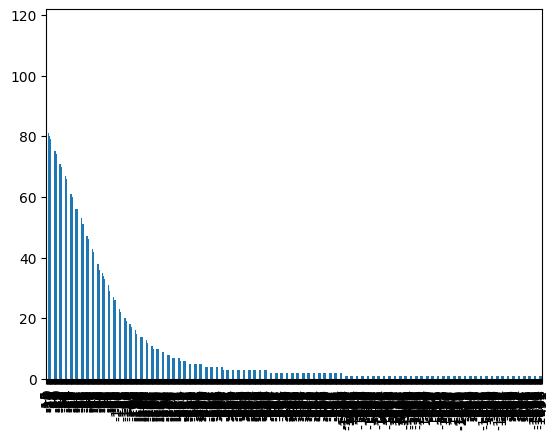

In [ ]:
df['X1'].value_counts().plot.bar()

<Axes: >

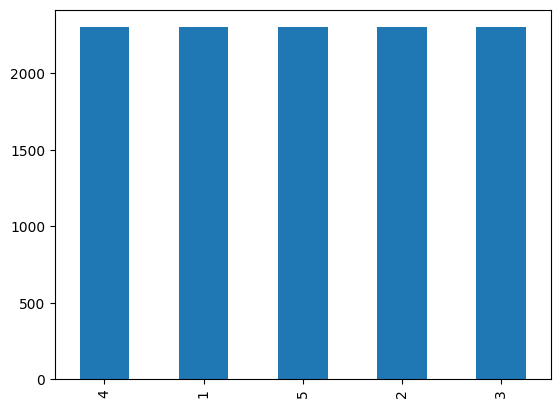

In [ ]:
df['y'].value_counts().plot.bar()

In [ ]:
df.groupby('X1').groups

{-1839: [6388], -1741: [4224], -1676: [726], -1548: [10969], -1476: [3113], -1350: [8167], -1285: [1891], -1269: [7333], -1256: [3799], -1172: [7916], -1154: [7459], -1112: [365], -1108: [4834], -1075: [10134], -1072: [6665], -1066: [529], -1063: [6244], -1054: [4064], -1052: [8222], -1051: [6653], -1047: [7513], -1023: [8032], -1009: [9069], -991: [1734], -988: [1179], -985: [7116], -980: [10554], -979: [9222], -955: [378], -950: [10796], -947: [5767], -944: [2957, 3651], -938: [5267], -925: [1361], -923: [469], -912: [632], -898: [1786], -897: [10442], -888: [6582], -875: [6229], -872: [2216, 6468], -869: [10414], -867: [6140], -862: [5446], -854: [2233], -853: [5197], -848: [4180], -847: [740], -846: [1314], -844: [10327], -843: [748], -841: [6032], -837: [7098], -836: [462], -835: [9067], -831: [2767], -827: [9904], -809: [2983], -800: [8020], -793: [8958], -782: [5026], -763: [4528], -759: [3730], -757: [5595], -755: [4271], -754: [8970], -753: [3100], -751: [9360], -749: [4796], 

**Seaborn Data Visualization Box Plot**

<Axes: ylabel='y'>

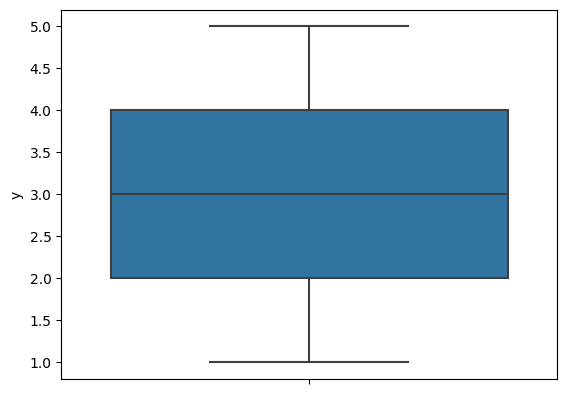

In [ ]:
sns.boxplot(y='y',data = df)

<Axes: xlabel='X1', ylabel='y'>

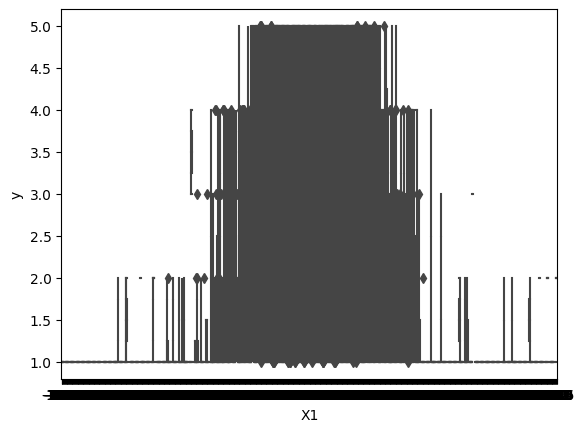

In [ ]:
sns.boxplot(x='X1',y='y',data=df)

**Heatmaps**

In [ ]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837    162.11912    162.033

<ipython-input-21-ea4f561a8777>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


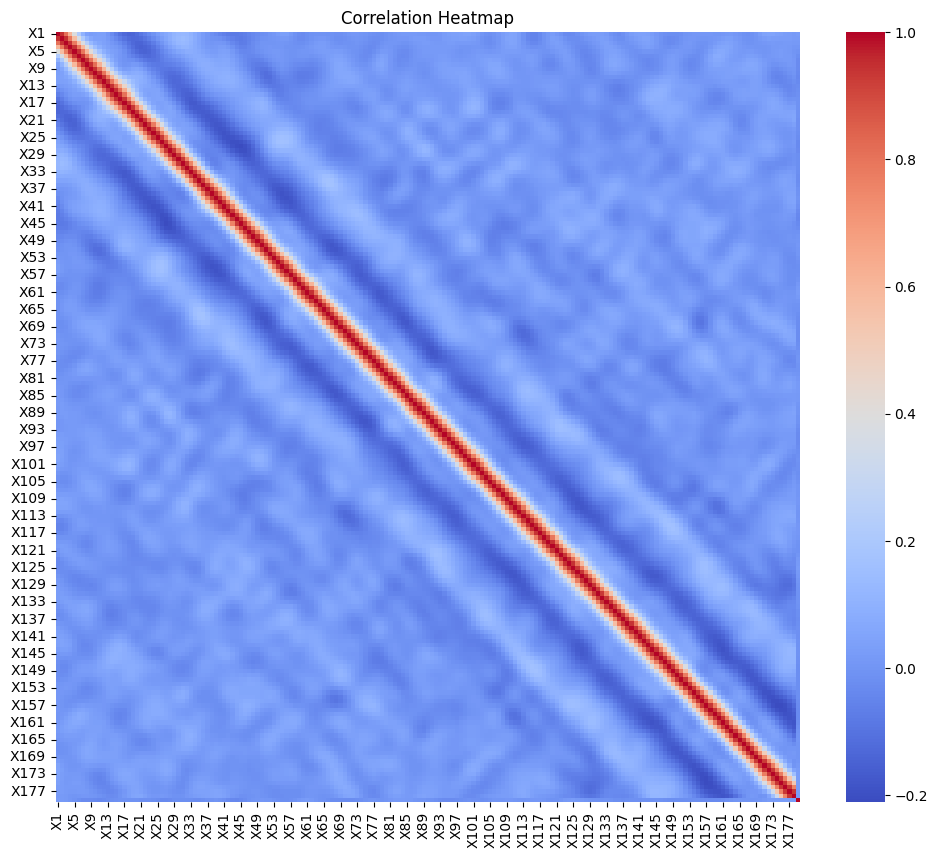

In [ ]:
# Display basic statistics
stats = df.describe()
print(stats)

# Calculate correlations
correlation_matrix = df.corr()

# Create a heatmap of correlations using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

**Violin Plots**

<Axes: xlabel='X1', ylabel='y'>

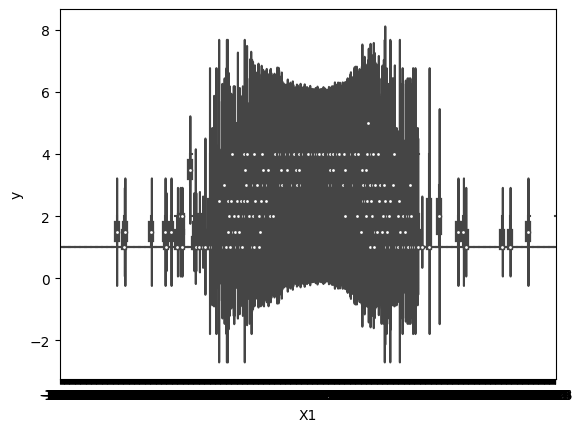

In [ ]:
sns.violinplot(x='X1',y='y',data=df)

**Reg Plot**

<Axes: xlabel='X1', ylabel='y'>

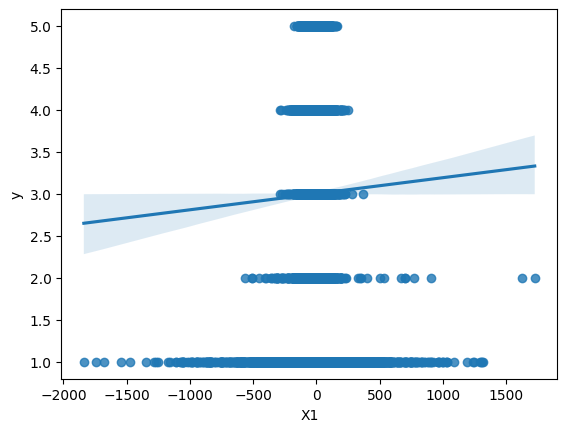

In [ ]:
sns.regplot(x='X1',y='y',data=df)

# Data Analysis EDA

**Pandas Data Structures**

In [ ]:
df['X1'].mean()

-11.581391304347827

In [ ]:
df['X1'].max()

1726

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


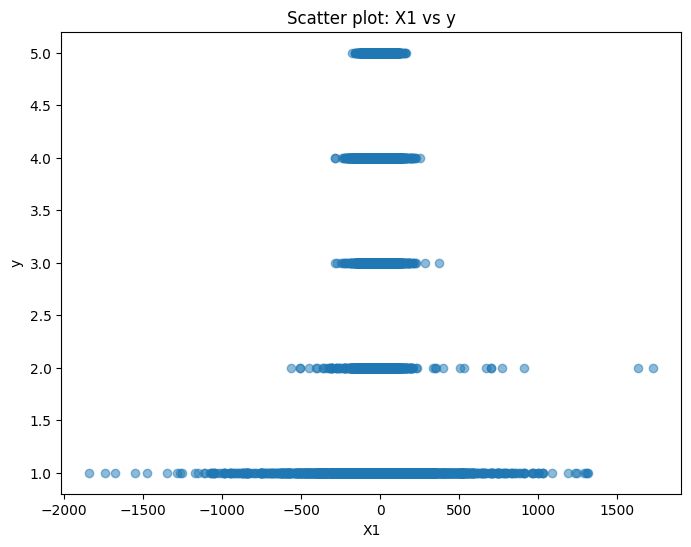

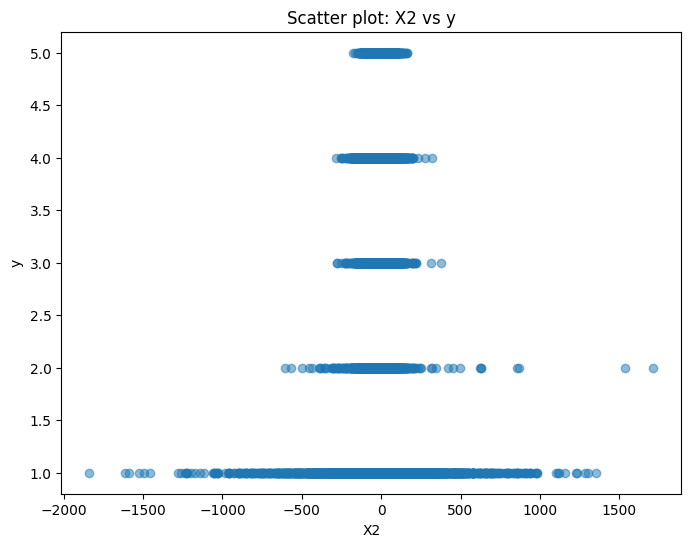

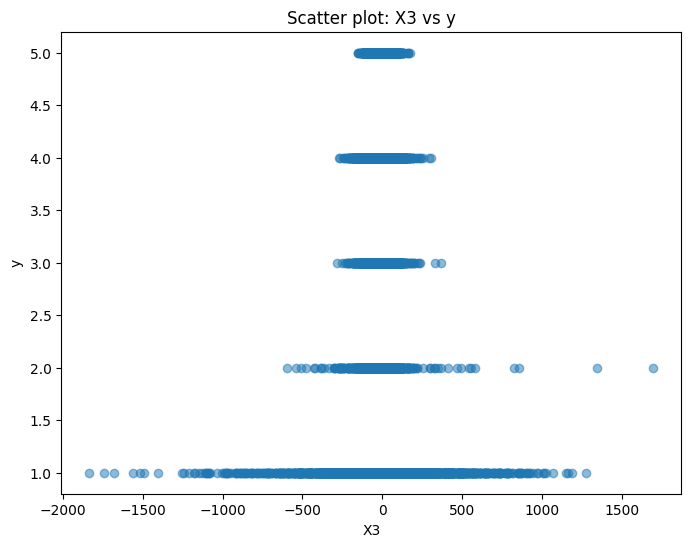

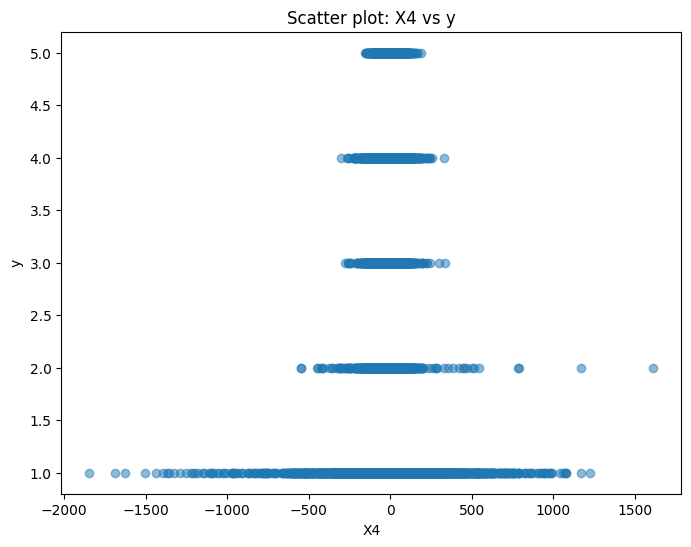

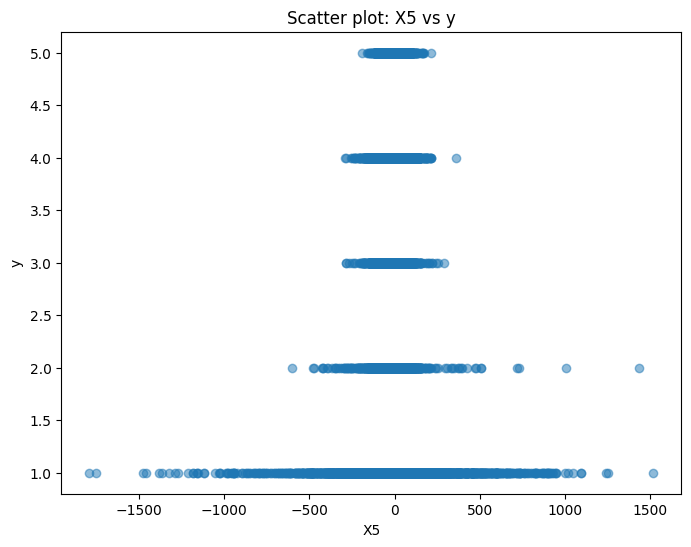

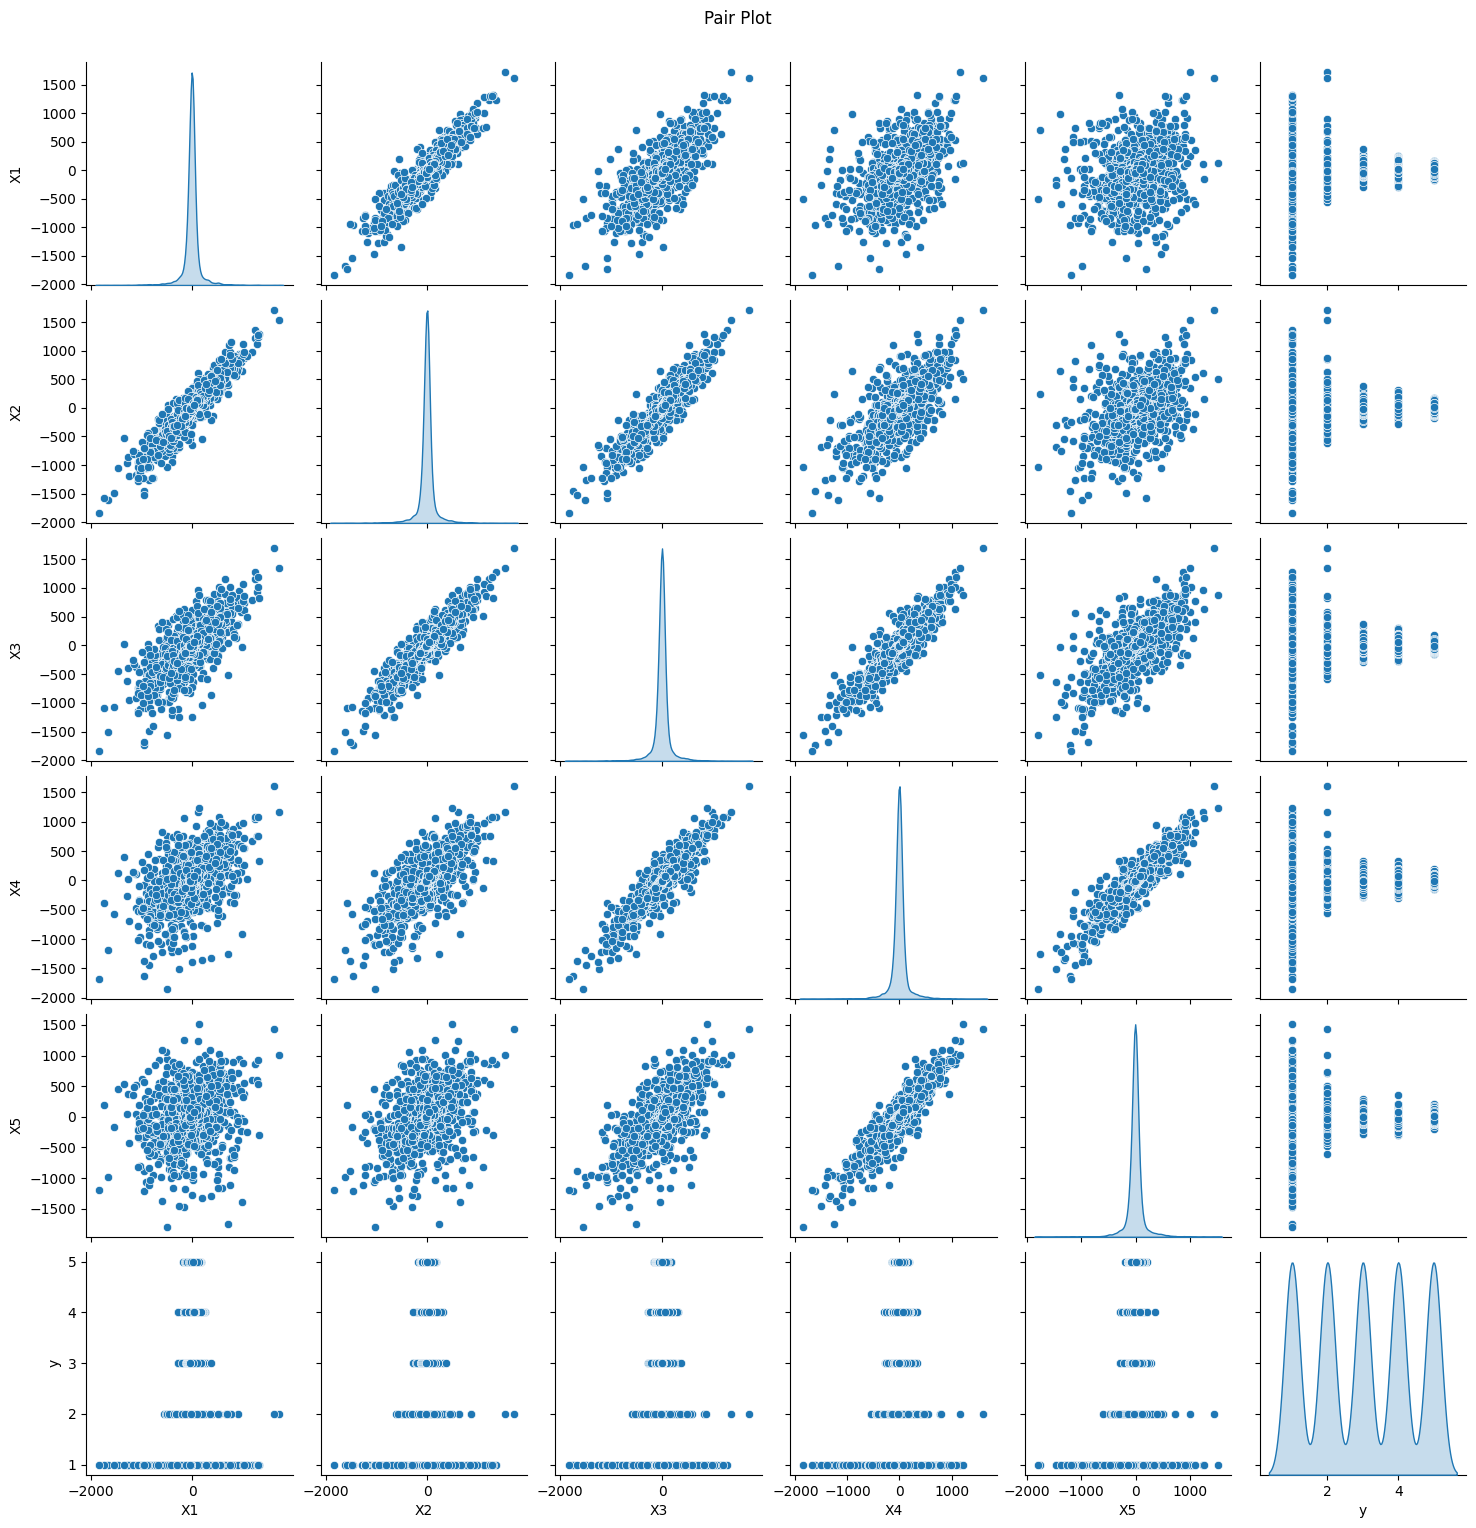

In [ ]:
# Choose the columns you want to explore correlations for
selected_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'y']

# Create scatter plots for selected pairs of columns
for col in selected_columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df['y'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('y')
    plt.title(f'Scatter plot: {col} vs y')
    plt.show()

# Create a pair plot for selected columns
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()